In [1]:
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

import os
import string
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import lightgbm as lgb

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [2]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\CSELAB\Downloads\matched_drug_data.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the data
data.head()


uniqueID  Drug Name                                       Generic Name  \
0     76202  Abatacept  abatacept [  a-BAY-ta-sept  ] \n Brand names: ...   
1     76198  Abatacept  abatacept [  a-BAY-ta-sept  ] \n Brand names: ...   
2     76194  Abatacept  abatacept [  a-BAY-ta-sept  ] \n Brand names: ...   
3     76210  Abatacept  abatacept [  a-BAY-ta-sept  ] \n Brand names: ...   
4     76218  Abatacept  abatacept [  a-BAY-ta-sept  ] \n Brand names: ...   

      Drug Class                                               Uses  \
0  Not Available  Abatacept (Orencia) is used to treatrheumatoid...   
1  Not Available  Abatacept (Orencia) is used to treatrheumatoid...   
2  Not Available  Abatacept (Orencia) is used to treatrheumatoid...   
3  Not Available  Abatacept (Orencia) is used to treatrheumatoid...   
4  Not Available  Abatacept (Orencia) is used to treatrheumatoid...   

                                            Warnings  \
0  Follow all directions on your medicine label a...   
1  Follow all directions on your medicine label a...   
2  Follow all directions on your medicine label a...   
3  Follow all directions on your medicine label a...   
4  Follow all directions on your medicine label a...   

                                Pre-Use Instructions  \
0  You should not use abatacept if you are allerg...   
1  You should not use abatacept if you are allerg...   
2  You should not use abatacept if you are allerg...   
3  You should not use abatacept if you are allerg...   
4  You should not use abatacept if you are allerg...   

                                              Dosage  \
0  IV Dosing Regimen:Weight less than 60 kg: 500 ...   
1  IV Dosing Regimen:Weight less than 60 kg: 500 ...   
2  IV Dosing Regimen:Weight less than 60 kg: 500 ...   
3  IV Dosing Regimen:Weight less than 60 kg: 500 ...   
4  IV Dosing Regimen:Weight less than 60 kg: 500 ...   

                                        Side Effects  \
0  fevernausea,diarrhea, stomach painheadachecold...   
1  fevernausea,diarrhea, stomach painheadachecold...   
2  fevernausea,diarrhea, stomach painheadachecold...   
3  fevernausea,diarrhea, stomach painheadachecold...   
4  fevernausea,diarrhea, stomach painheadachecold...   

                       condition  \
0  Juvenile Idiopathic Arthritis   
1           Rheumatoid Arthritis   
2           Rheumatoid Arthritis   
3           Rheumatoid Arthritis   
4           Rheumatoid Arthritis   

                                              review  rating       date  \
0  "I loved it til I had my first reaction after ...       7  17-Feb-17   
1  "I have been on Orencia for 3.5 years and diag...      10  29-Sep-17   
2  "I switched to Orencia couple months ago. I ha...       9  15-Mar-09   
3  "My RA attacked my lungs, turning my lung tiss...       7  12-Feb-16   
4  "Limited improvement after 4 months, developed...       2  15-Mar-14   

   usefulCount  
0            2  
1            9  
2           92  
3           44  
4           35

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130185 entries, 0 to 130184
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   uniqueID              130185 non-null  int64 
 1   Drug Name             130185 non-null  object
 2   Generic Name          130185 non-null  object
 3   Drug Class            130185 non-null  object
 4   Uses                  130185 non-null  object
 5   Warnings              130185 non-null  object
 6   Pre-Use Instructions  130185 non-null  object
 7   Dosage                130185 non-null  object
 8   Side Effects          130185 non-null  object
 9   condition             129801 non-null  object
 10  review                130185 non-null  object
 11  rating                130185 non-null  int64 
 12  date                  130185 non-null  object
 13  usefulCount           130185 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 13.9+ MB


In [4]:
data.isnull().sum()

uniqueID                  0
Drug Name                 0
Generic Name              0
Drug Class                0
Uses                      0
Warnings                  0
Pre-Use Instructions      0
Dosage                    0
Side Effects              0
condition               384
review                    0
rating                    0
date                      0
usefulCount               0
dtype: int64

In [5]:
missing_condition_rows = data[data['condition'].isnull()]
missing_condition_rows

uniqueID     Drug Name  \
1810      187595     Acyclovir   
4007       38080     Aliskiren   
4217      146933    Alprazolam   
4350      201783    Alprazolam   
4386      147329    Alprazolam   
...          ...           ...   
123260     93243  Vortioxetine   
129097      8358      Zolpidem   
129251      8523      Zolpidem   
129299      8159      Zolpidem   
129495      8587      Zolpidem   

                                             Generic Name  \
1810    acyclovir (oral) [  a-SYE-klo-veer  ] \n Brand...   
4007    aliskiren [  a-LIS-ke-rin  ] \n Brand name:   ...   
4217    alprazolam \n Brand names:   Xanax ,  Xanax XR...   
4350    alprazolam \n Brand names:   Xanax ,  Xanax XR...   
4386    alprazolam \n Brand names:   Xanax ,  Xanax XR...   
...                                                   ...   
123260                                      Not Available   
129097  zolpidem [  zole-PI-dem  ] \n Brand names:   A...   
129251  zolpidem [  zole-PI-dem  ] \n Brand names:   A...   
129299  zolpidem [  zole-PI-dem  ] \n Brand names:   A...   
129495  zolpidem [  zole-PI-dem  ] \n Brand names:   A...   

                                               Drug Class  \
1810                                   Purine nucleosides   
4007                                     Renin inhibitors   
4217                                      Benzodiazepines   
4350                                      Benzodiazepines   
4386                                      Benzodiazepines   
...                                                   ...   
123260                      Miscellaneous antidepressants   
129097  Miscellaneous anxiolytics, sedatives and hypno...   
129251  Miscellaneous anxiolytics, sedatives and hypno...   
129299  Miscellaneous anxiolytics, sedatives and hypno...   
129495  Miscellaneous anxiolytics, sedatives and hypno...   

                                                     Uses  \
1810    Acycloviris an antiviral drug. It slows the gr...   
4007    Aliskiren is used to treathigh blood pressure(...   
4217    Alprazolamis abenzodiazepine(ben-zoe-dye-AZE-e...   
4350    Alprazolamis abenzodiazepine(ben-zoe-dye-AZE-e...   
4386    Alprazolamis abenzodiazepine(ben-zoe-dye-AZE-e...   
...                                                   ...   
123260  Vortioxetine (Trintellix) is an antidepressant...   
129097  Zolpidem is used in adults to treatinsomnia.\n...   
129251  Zolpidem is used in adults to treatinsomnia.\n...   
129299  Zolpidem is used in adults to treatinsomnia.\n...   
129495  Zolpidem is used in adults to treatinsomnia.\n...   

                                                 Warnings  \
1810    Follow all directions on your medicine label a...   
4007    Do not use if you are pregnant. Stop using  al...   
4217    MISUSE OF ALPRAZOLAM CAN CAUSE ADDICTION, OVER...   
4350    MISUSE OF ALPRAZOLAM CAN CAUSE ADDICTION, OVER...   
4386    MISUSE OF ALPRAZOLAM CAN CAUSE ADDICTION, OVER...   
...                                                   ...   
123260  Suicidal Thoughts and Behaviors in Adolescents...   
129097  Never use zolpidem in larger amounts, or for l...   
129251  Never use zolpidem in larger amounts, or for l...   
129299  Never use zolpidem in larger amounts, or for l...   
129495  Never use zolpidem in larger amounts, or for l...   

                                     Pre-Use Instructions  \
1810    You should not take acyclovir if you are aller...   
4007    You should not take aliskiren if you are aller...   
4217    You should not take alprazolam if:\nyou also t...   
4350    You should not take alprazolam if:\nyou also t...   
4386    You should not take alprazolam if:\nyou also t...   
...                                                   ...   
123260  You should not use this medicine if you have a...   
129097  You should not use zolpidem if you are allergi...   
129251  You should not use zolpidem if you are allergi...   
129299  You should not use zolpidem if you are allergi...

In [6]:
data['condition'].fillna('Not Available', inplace=True)
most_frequent = data['condition'].mode()[0]
data['condition'].fillna(most_frequent, inplace=True)

In [7]:
data.isnull().sum()

uniqueID                0
Drug Name               0
Generic Name            0
Drug Class              0
Uses                    0
Warnings                0
Pre-Use Instructions    0
Dosage                  0
Side Effects            0
condition               0
review                  0
rating                  0
date                    0
usefulCount             0
dtype: int64

In [8]:
# Drop the 'uniqueID' column
data = data.drop(columns=['uniqueID'])
data.head()

Drug Name                                       Generic Name  \
0  Abatacept  abatacept [  a-BAY-ta-sept  ] \n Brand names: ...   
1  Abatacept  abatacept [  a-BAY-ta-sept  ] \n Brand names: ...   
2  Abatacept  abatacept [  a-BAY-ta-sept  ] \n Brand names: ...   
3  Abatacept  abatacept [  a-BAY-ta-sept  ] \n Brand names: ...   
4  Abatacept  abatacept [  a-BAY-ta-sept  ] \n Brand names: ...   

      Drug Class                                               Uses  \
0  Not Available  Abatacept (Orencia) is used to treatrheumatoid...   
1  Not Available  Abatacept (Orencia) is used to treatrheumatoid...   
2  Not Available  Abatacept (Orencia) is used to treatrheumatoid...   
3  Not Available  Abatacept (Orencia) is used to treatrheumatoid...   
4  Not Available  Abatacept (Orencia) is used to treatrheumatoid...   

                                            Warnings  \
0  Follow all directions on your medicine label a...   
1  Follow all directions on your medicine label a...   
2  Follow all directions on your medicine label a...   
3  Follow all directions on your medicine label a...   
4  Follow all directions on your medicine label a...   

                                Pre-Use Instructions  \
0  You should not use abatacept if you are allerg...   
1  You should not use abatacept if you are allerg...   
2  You should not use abatacept if you are allerg...   
3  You should not use abatacept if you are allerg...   
4  You should not use abatacept if you are allerg...   

                                              Dosage  \
0  IV Dosing Regimen:Weight less than 60 kg: 500 ...   
1  IV Dosing Regimen:Weight less than 60 kg: 500 ...   
2  IV Dosing Regimen:Weight less than 60 kg: 500 ...   
3  IV Dosing Regimen:Weight less than 60 kg: 500 ...   
4  IV Dosing Regimen:Weight less than 60 kg: 500 ...   

                                        Side Effects  \
0  fevernausea,diarrhea, stomach painheadachecold...   
1  fevernausea,diarrhea, stomach painheadachecold...   
2  fevernausea,diarrhea, stomach painheadachecold...   
3  fevernausea,diarrhea, stomach painheadachecold...   
4  fevernausea,diarrhea, stomach painheadachecold...   

                       condition  \
0  Juvenile Idiopathic Arthritis   
1           Rheumatoid Arthritis   
2           Rheumatoid Arthritis   
3           Rheumatoid Arthritis   
4           Rheumatoid Arthritis   

                                              review  rating       date  \
0  "I loved it til I had my first reaction after ...       7  17-Feb-17   
1  "I have been on Orencia for 3.5 years and diag...      10  29-Sep-17   
2  "I switched to Orencia couple months ago. I ha...       9  15-Mar-09   
3  "My RA attacked my lungs, turning my lung tiss...       7  12-Feb-16   
4  "Limited improvement after 4 months, developed...       2  15-Mar-14   

   usefulCount  
0            2  
1            9  
2           92  
3           44  
4           35

In [9]:
data.describe()

rating    usefulCount
count  130185.00000  130185.000000
mean        7.13967      34.171410
std         3.20668      40.301987
min         1.00000       0.000000
25%         5.00000       9.000000
50%         9.00000      22.000000
75%        10.00000      45.000000
max        10.00000    1291.000000

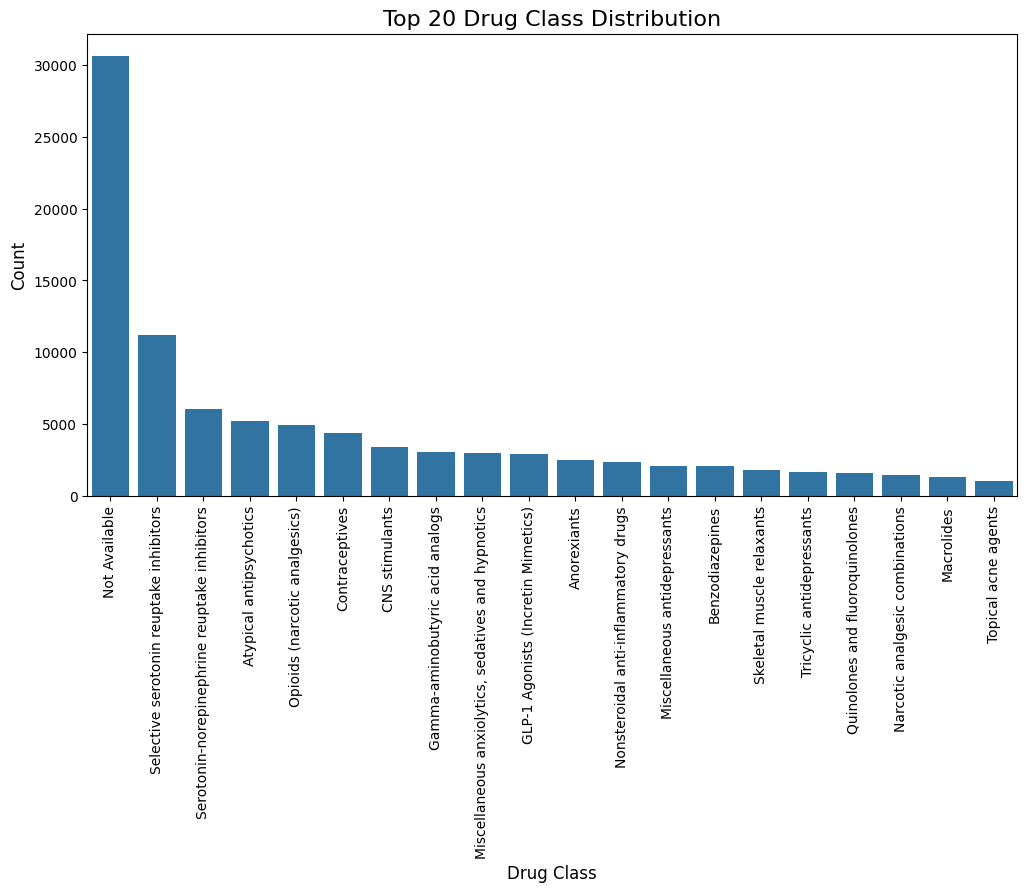

In [10]:
# Get the top 20 most frequent drug classes
top_20_classes = data['Drug Class'].value_counts().head(20).index

# Filter the data to include only the top 20 drug classes
filtered_data = data[data['Drug Class'].isin(top_20_classes)]
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='Drug Class', order=top_20_classes)
plt.title("Top 20 Drug Class Distribution", fontsize=16)
plt.xlabel("Drug Class", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=90)
plt.show()

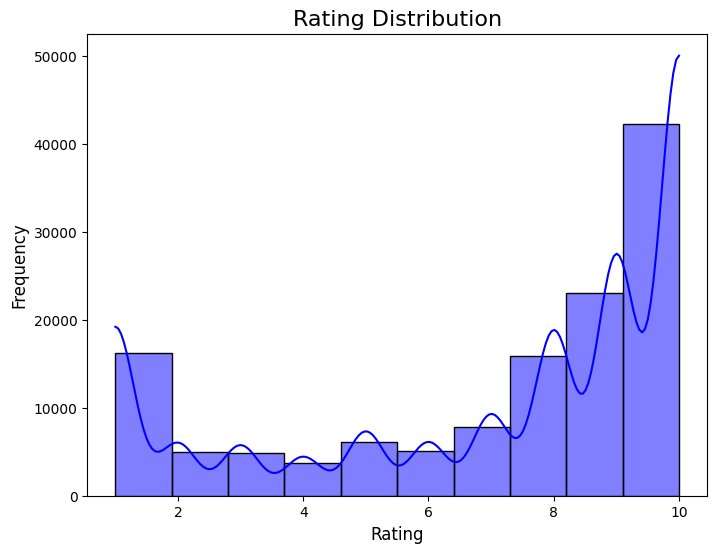

In [11]:
# Rating Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='rating', bins=10, kde=True, color='blue')
plt.title("Rating Distribution", fontsize=16)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


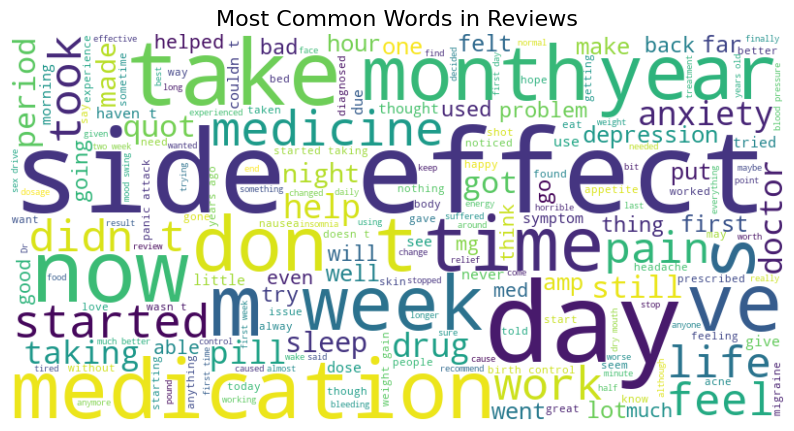

In [12]:
from wordcloud import WordCloud
# Word Cloud for Reviews
text = " ".join(review for review in data['review'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Reviews", fontsize=16)
plt.show()


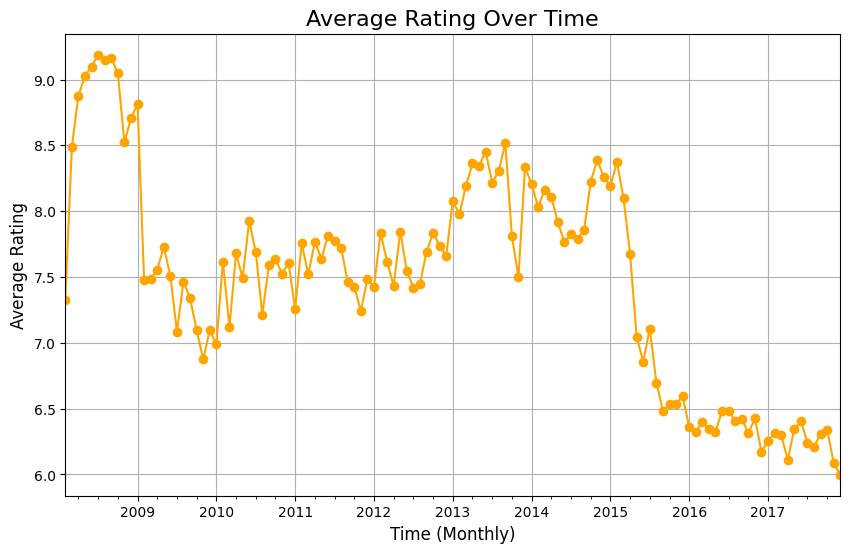

In [13]:
# Ensure 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'])

# Average rating over time
time_data = data.groupby(data['date'].dt.to_period('M')).mean(numeric_only=True)['rating']
time_data.plot(kind='line', figsize=(10, 6), marker='o', color='orange')

plt.title("Average Rating Over Time", fontsize=16)
plt.xlabel("Time (Monthly)", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.grid(True)
plt.show()


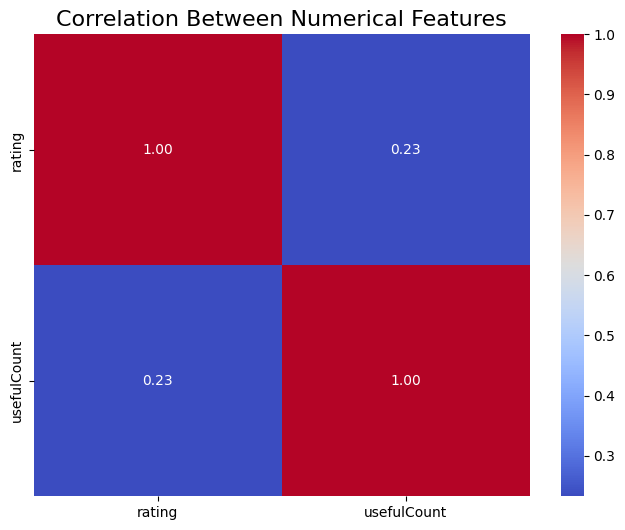

In [14]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation = data[['rating', 'usefulCount']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Numerical Features", fontsize=16)
plt.show()


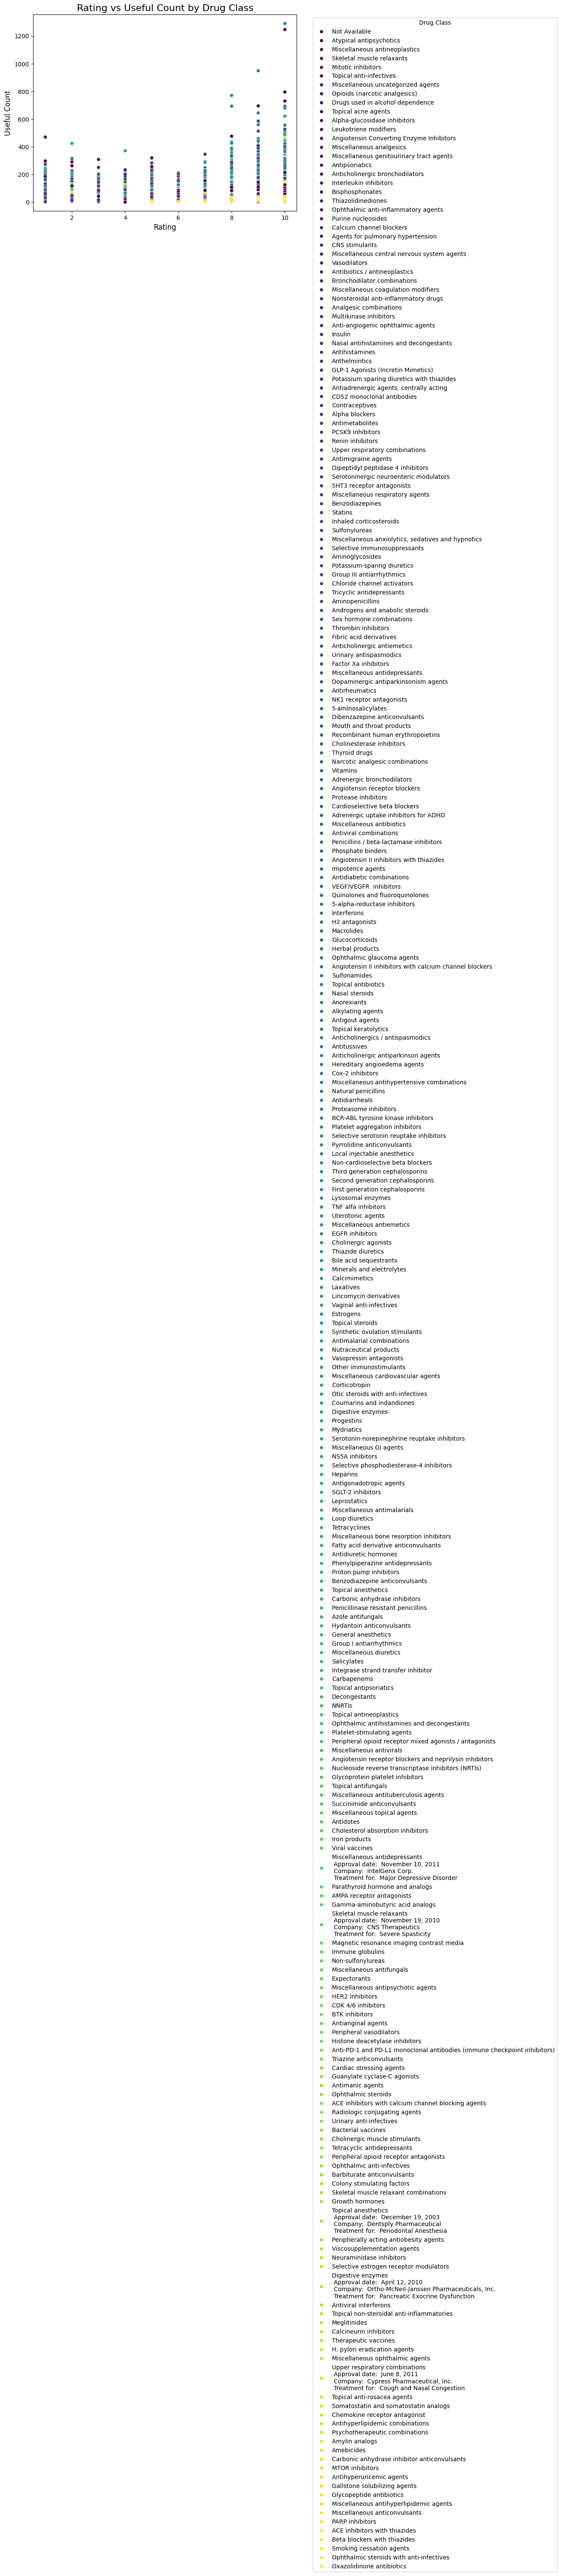

In [15]:
# Scatter plot for Rating vs Useful Count
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='rating', y='usefulCount', hue='Drug Class', palette='viridis')
plt.title("Rating vs Useful Count by Drug Class", fontsize=16)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Useful Count", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Drug Class")
plt.show()


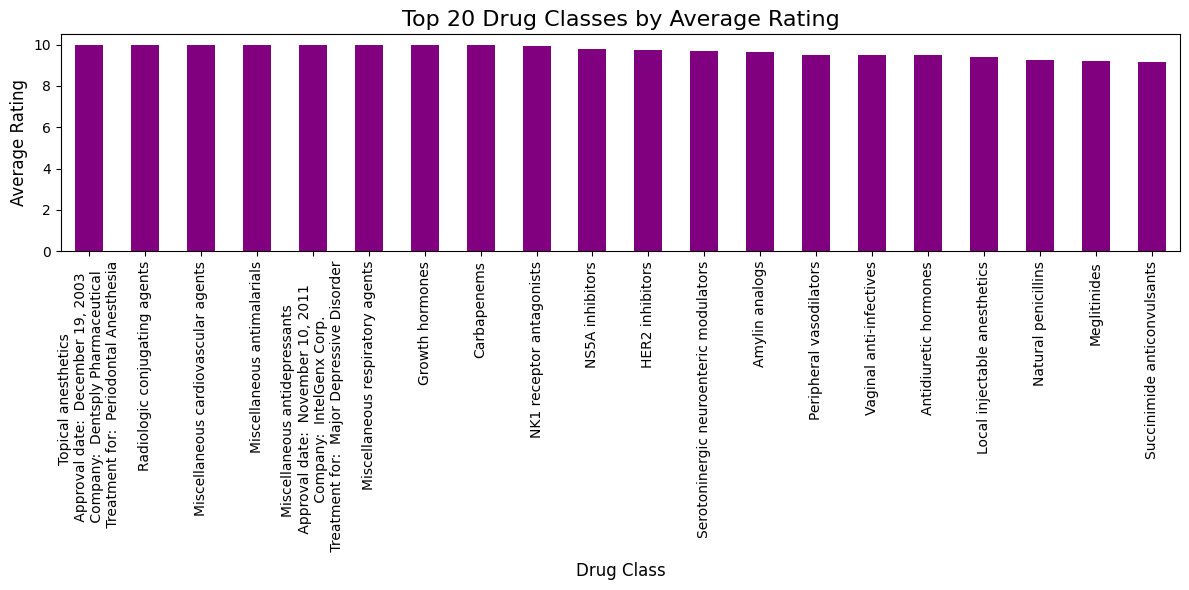

In [16]:
# Calculate the average rating for each drug class
grouped_data = data.groupby('Drug Class')['rating'].mean()

# Select the top 20 drug classes by average rating
top_20_classes = grouped_data.sort_values(ascending=False).head(20)
top_20_classes.plot(kind='bar', figsize=(12, 6), color='purple')
plt.title("Top 20 Drug Classes by Average Rating", fontsize=16)
plt.xlabel("Drug Class", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()


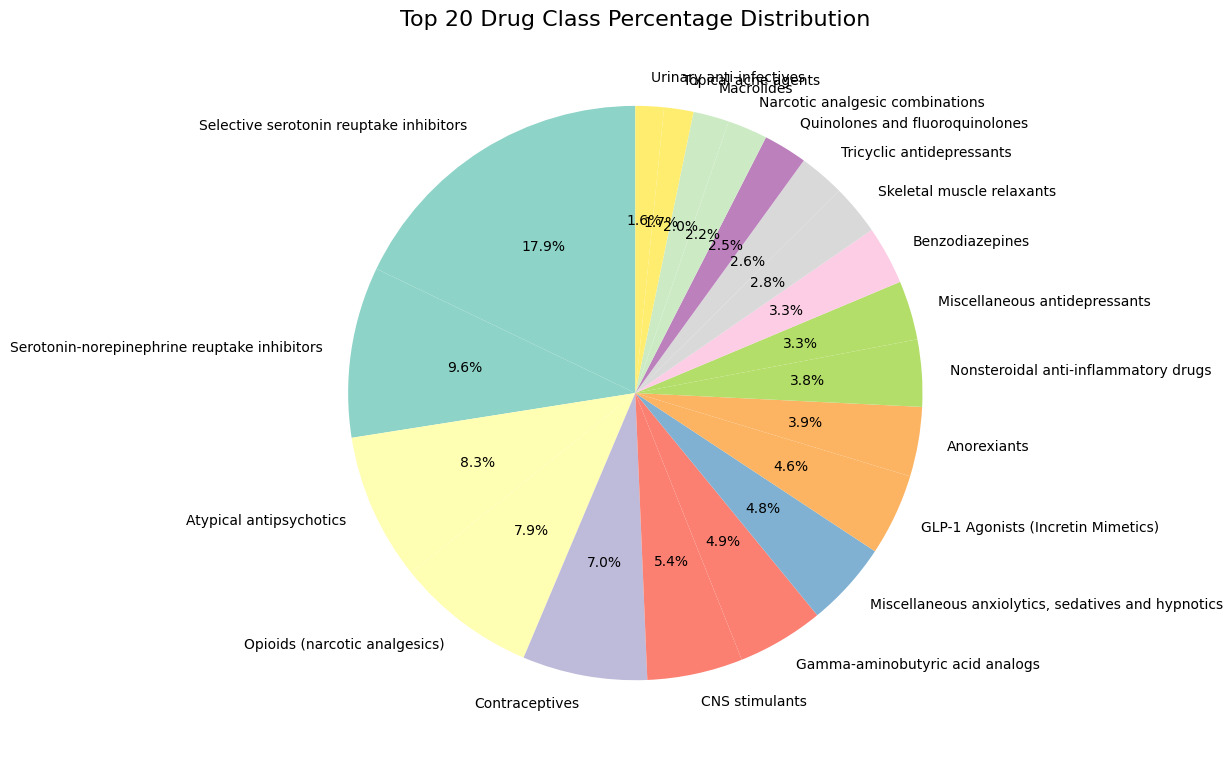

In [17]:
# Filter out "Not Available" entries
filtered_data = data[data['Drug Class'] != "Not Available"]

# Get the top 20 most frequent drug classes
top_20_classes = filtered_data['Drug Class'].value_counts().head(20)

# Plot the pie chart
plt.figure(figsize=(12, 12))
top_20_classes.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='Set3')

plt.title("Top 20 Drug Class Percentage Distribution", fontsize=16)
plt.ylabel("")  # Remove y-axis label for cleaner visualization
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


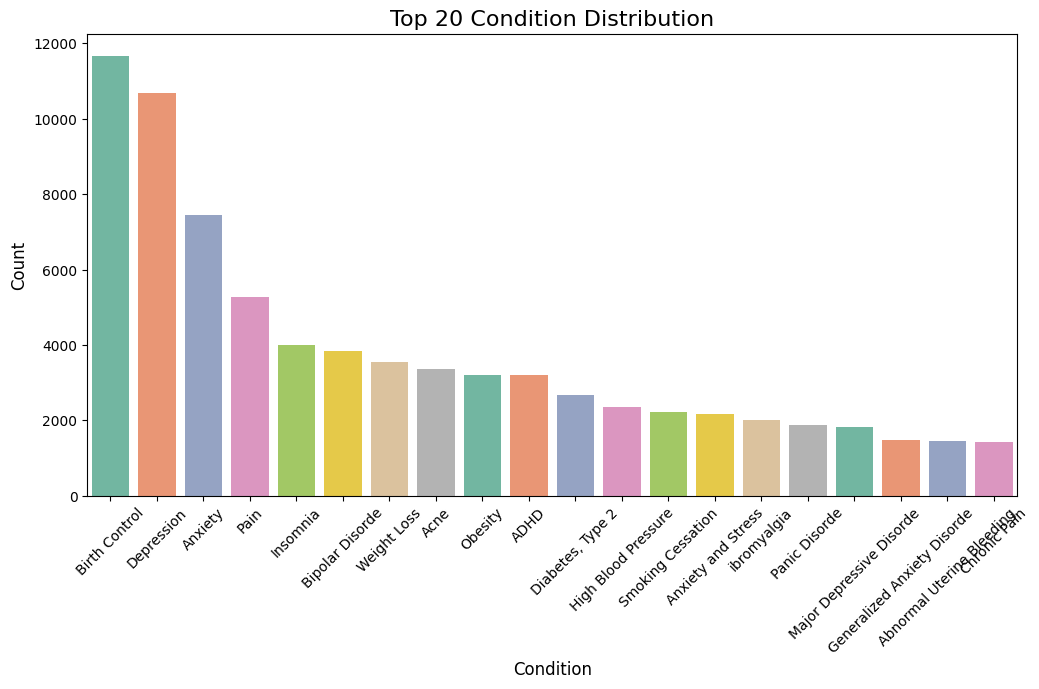

In [18]:
# Get the top 20 most frequent conditions
top_20_conditions = data['condition'].value_counts().head(20).index

# Filter the data to include only the top 20 conditions
filtered_data = data[data['condition'].isin(top_20_conditions)]

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='condition', order=top_20_conditions, palette='Set2')
plt.title("Top 20 Condition Distribution", fontsize=16)
plt.xlabel("Condition", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [19]:
# Sort the data by rating in descending order to get top-rated drugs
top_rated_drugs = data.sort_values(by='rating', ascending=False)

# Get the top 20 highest-rated drugs
top_20_rated_drugs = top_rated_drugs[['Drug Name', 'rating']].head(20)

# Display the table of top 20 rated drugs
import pandas as pd
top_20_rated_drugs = pd.DataFrame(top_20_rated_drugs)

# Show the table
top_20_rated_drugs


Drug Name  rating
6       Abatacept      10
7       Abatacept      10
130183      Zyvox      10
130174      Zyvox      10
130176      Zyvox      10
130179      Zyvox      10
130180      Zyvox      10
81223   Nexplanon      10
81226   Nexplanon      10
81241   Nexplanon      10
81249   Nexplanon      10
81250   Nexplanon      10
39        Abilify      10
43        Abilify      10
46        Abilify      10
22      Abatacept      10
26        Abilify      10
27        Abilify      10
30        Abilify      10
35        Abilify      10

In [20]:
# Count the frequency of each unique review
review_frequency = data['review'].value_counts().reset_index(name='Frequency')
review_frequency.columns = ['Review', 'Frequency']

# Display the top 10 most frequent reviews
print(review_frequency.head(50))


                                               Review  Frequency
0                                              "Good"         27
1                                             "Great"         20
2                                             "Good."         20
3                                         "Very good"         14
4                                            "Great."         14
5                                         "Excellent"         11
6                                       "Works well."         10
7                                    "Saved my life."         10
8                                        "Very good."          8
9                                       "Works great"          8
10                     "This medicine saved my life."          7
11                        "Did not work well for me."          6
12                                           "Great!"          6
13                                  "Very effective."          6
14                       

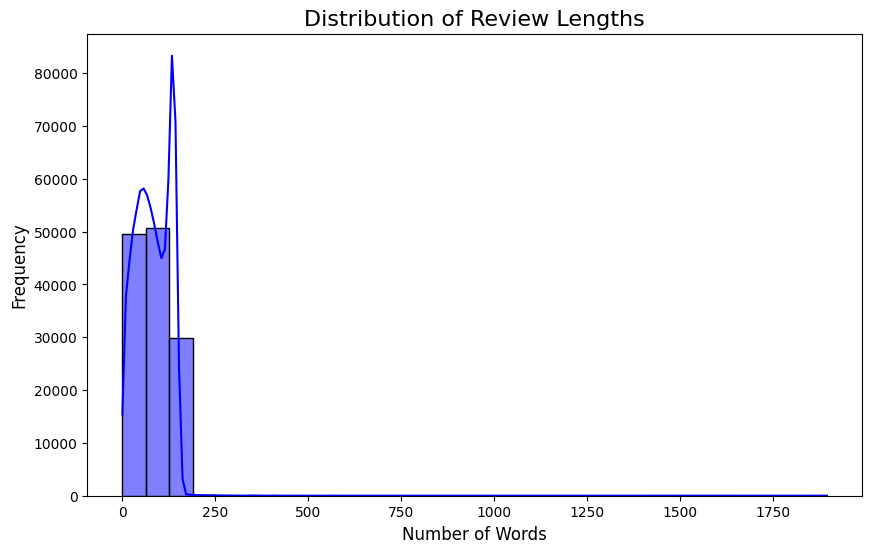

In [21]:
# Create a new column for the length of each review (in terms of words)
data['review_length'] = data['review'].apply(lambda x: len(str(x).split()))

# Plotting the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['review_length'], kde=True, color='blue', bins=30)

# Add titles and labels
plt.title("Distribution of Review Lengths", fontsize=16)
plt.xlabel("Number of Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


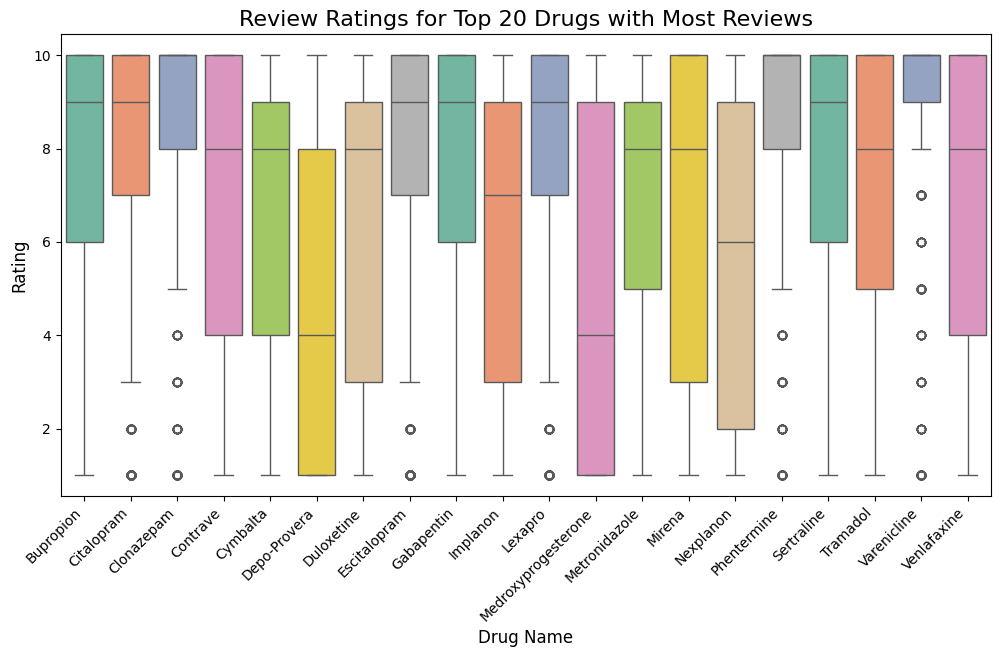

In [22]:
# Count the number of reviews for each drug
drug_review_count = data['Drug Name'].value_counts().reset_index(name='Review Count')
drug_review_count.columns = ['Drug Name', 'Review Count']

# Select the top 20 drugs with the most reviews
top_20_drugs = drug_review_count.head(20)['Drug Name']

# Filter the data to include only the top 20 drugs
top_20_drugs_data = data[data['Drug Name'].isin(top_20_drugs)]

# Plotting the box plot for the top 20 drugs
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_20_drugs_data, x='Drug Name', y='rating', palette='Set2')

# Add titles and labels
plt.title("Review Ratings for Top 20 Drugs with Most Reviews", fontsize=16)
plt.xlabel("Drug Name", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.show()


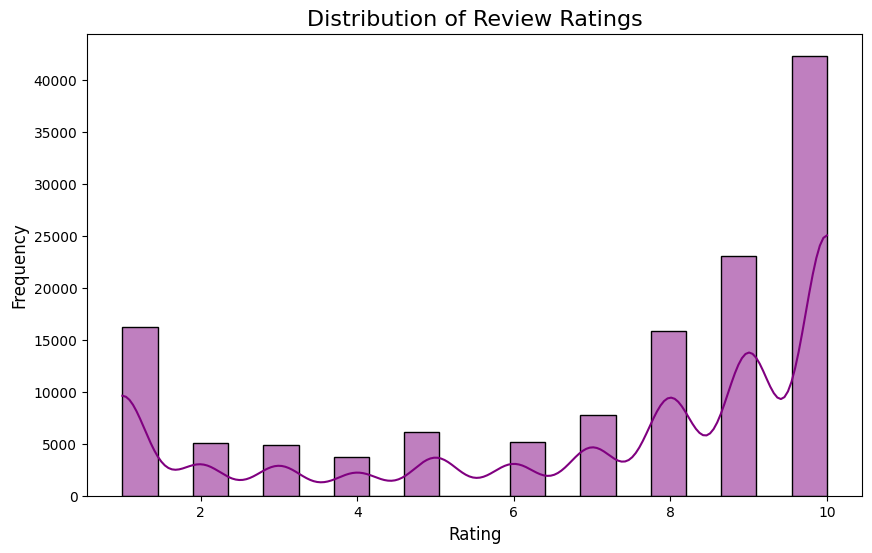

In [23]:
# Plotting the distribution of review ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], kde=True, color='purple', bins=20)

# Add titles and labels
plt.title("Distribution of Review Ratings", fontsize=16)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


In [24]:
# Define bins for rating
rating_bins = [0, 4, 7, 10]
rating_labels = ['Low', 'Medium', 'High']
# Create a new column 'rating_category' based on the bins
data['rating_category'] = pd.cut(data['rating'], bins=rating_bins, labels=rating_labels, right=True)
# Display the first few rows to verify the new column
data[['rating', 'rating_category']].head()


rating rating_category
0       7          Medium
1      10            High
2       9            High
3       7          Medium
4       2             Low

In [25]:
# Count the number of reviews in each rating category
rating_distribution = data['rating_category'].value_counts()
print(rating_distribution)

rating_category
High      81236
Low       29861
Medium    19088
Name: count, dtype: int64


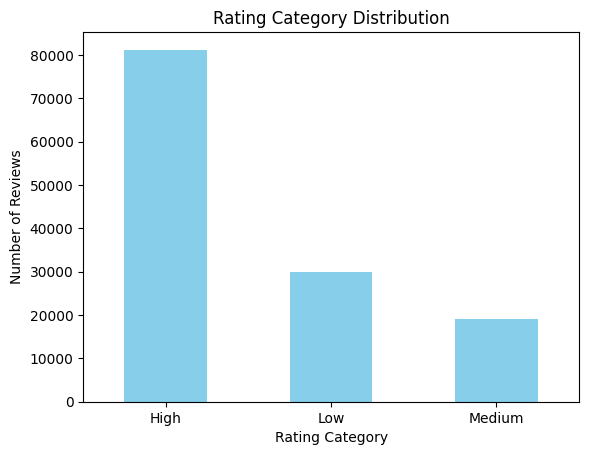

In [26]:
import matplotlib.pyplot as plt
rating_distribution.plot(kind='bar', color='skyblue')
plt.title('Rating Category Distribution')
plt.xlabel('Rating Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()


In [27]:
data.shape

(130185, 15)

In [28]:
not_available_counts = (data == 'Not Available').sum()
print(not_available_counts)

Drug Name                   0
Generic Name             3235
Drug Class              30662
Uses                     7786
Warnings                11197
Pre-Use Instructions    13701
Dosage                    315
Side Effects               41
condition                 384
review                      0
rating                      0
date                        0
usefulCount                 0
review_length               0
rating_category             0
dtype: int64


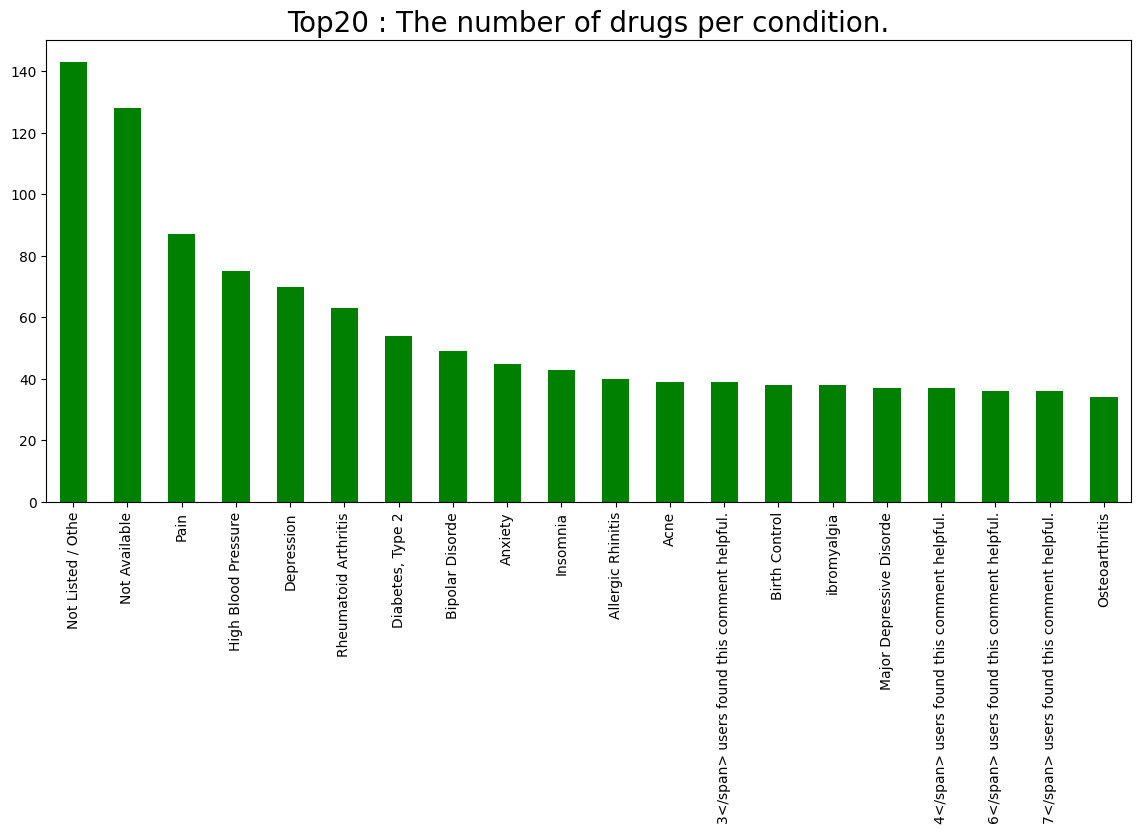

In [29]:
condition_dn = data.groupby(['condition'])['Drug Name'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)
plt.show()

As you can see from the picture above, the number of drugs for top eight conditions is about 100 for each condition. On the other hand, it should be noted that the phrase users found this comment helpful" appears in the condition, which seems like an error in the crawling process. I have looked into it to see in more details

In [30]:
data['review'][1]

'"I have been on Orencia for 3.5 years and diagnosed 4 years ago. I am so thankful that I responded so well to this medication. Orencia was the first medication and hopefully, the last. Since my first infusion, in 2013, and the symptoms were finally being held at bay, I have not had any issues to date. I, whole heartily, 100% recommend Orecina. It saved my life and gave me my life back. I hope it&#039;ll do the same for you."'

In [31]:
data['review'][2]

'"I switched to Orencia couple months ago. I have had 5 treatments so far.   Since I switched to Orencia, I noticed that there has been significant improvement with my Rheumatoid Arthritis.  I am able to sleep well again at night.  I wake up not feeling tired, achy and stiff. In comparison to the other rheumatoid arthritis medications I have taken, Orencia seems to be working more for me. I am no longer sleep deprived and am able to do some chores that I have not been able to do such as opening a jar, door, etc.  I experience tiredness after my treatment for one day, then up until the last few days of my next treatment, minor aches and stiffness are back.  I am hoping that Orencia will the wonder drug for me and everyone."'

In [32]:
!pip install wordcloud

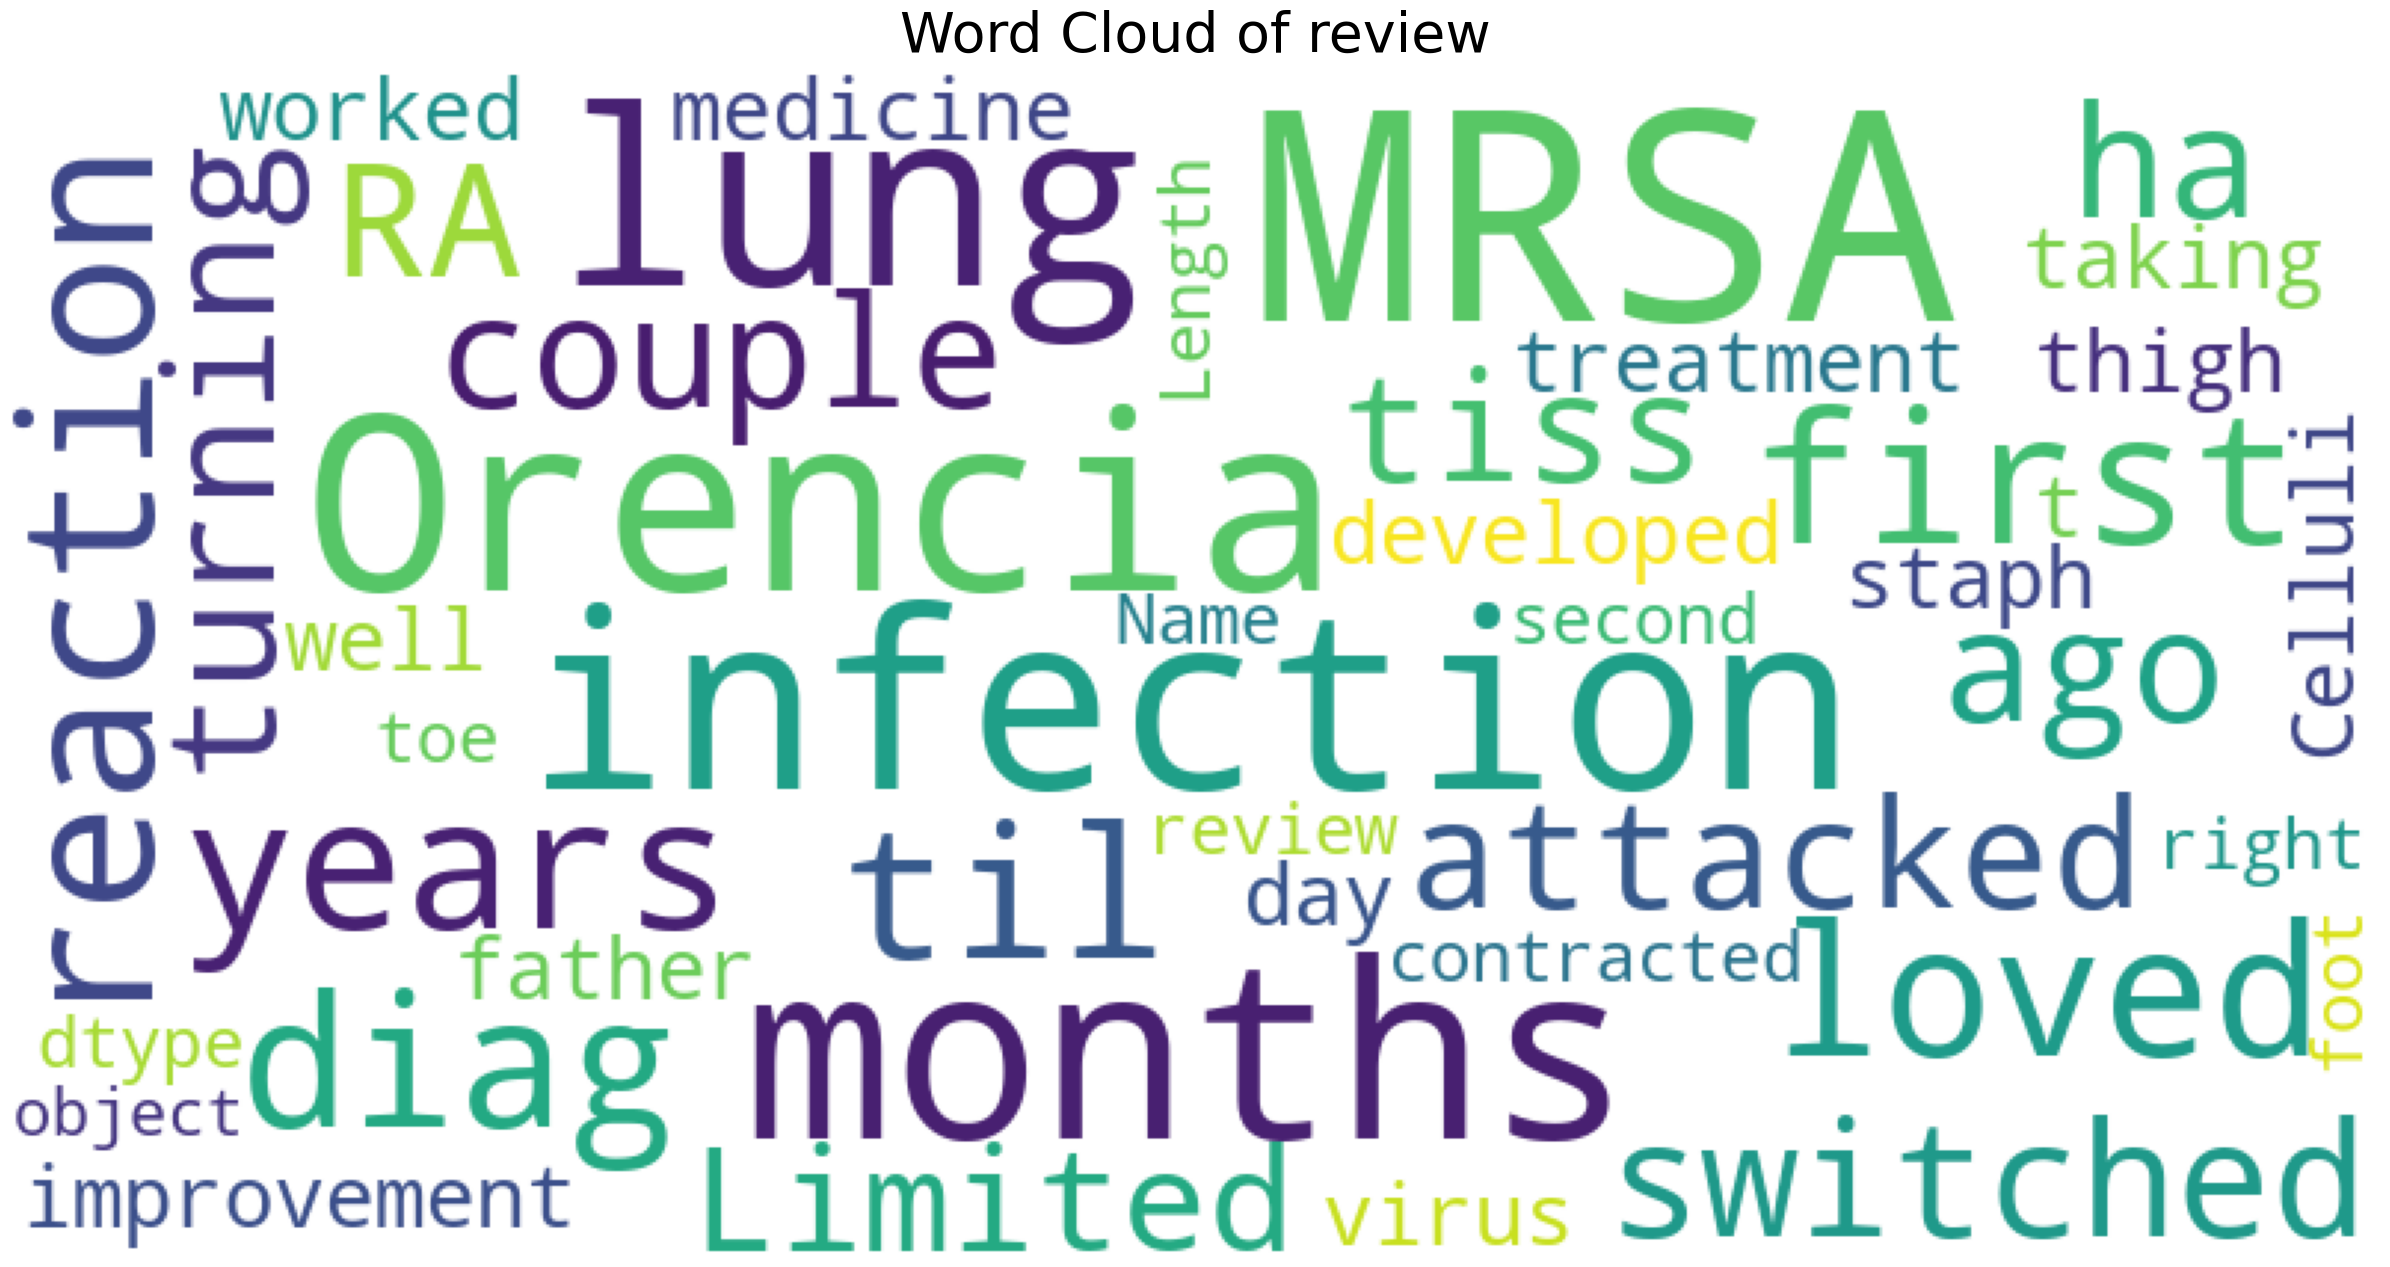

In [33]:
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(data["review"], title="Word Cloud of review")
plt.show()

In [34]:
from collections import defaultdict
data_6_10 = data[data["rating"]>5]
data_1_5 = data[data["rating"]<6]

In [35]:
!pip install plotly

In [36]:
## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from rating  8 to 10 review ##
freq_dict = defaultdict(int)
for sent in data_1_5["review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

## Get the bar chart from rating  4 to 7 review ##
freq_dict = defaultdict(int)
for sent in data_6_10["review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of rating 1 to 5", 
                                          "Frequent words of rating 6 to 10"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')
plt.show()

C:\Users\CSELAB\miniconda3\Lib\site-packages\plotly\tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [37]:
freq_dict = defaultdict(int)
for sent in data_1_5["review"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

freq_dict = defaultdict(int)
for sent in data_6_10["review"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent biagrams of rating 1 to 5", 
                                          "Frequent biagrams of rating 6 to 10"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=1200, width=1000, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')
plt.show()

C:\Users\CSELAB\miniconda3\Lib\site-packages\plotly\tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [38]:
freq_dict = defaultdict(int)
for sent in data_1_5["review"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'green')

freq_dict = defaultdict(int)
for sent in data_6_10["review"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent trigrams of rating 1 to 5", 
                                          "Frequent trigrams of rating 6 to 10"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=1200, width=1600, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
py.iplot(fig, filename='word-plots')
plt.show()

Next, we will look for relationship between rating and weather. First of all, we will count the number of ratings.

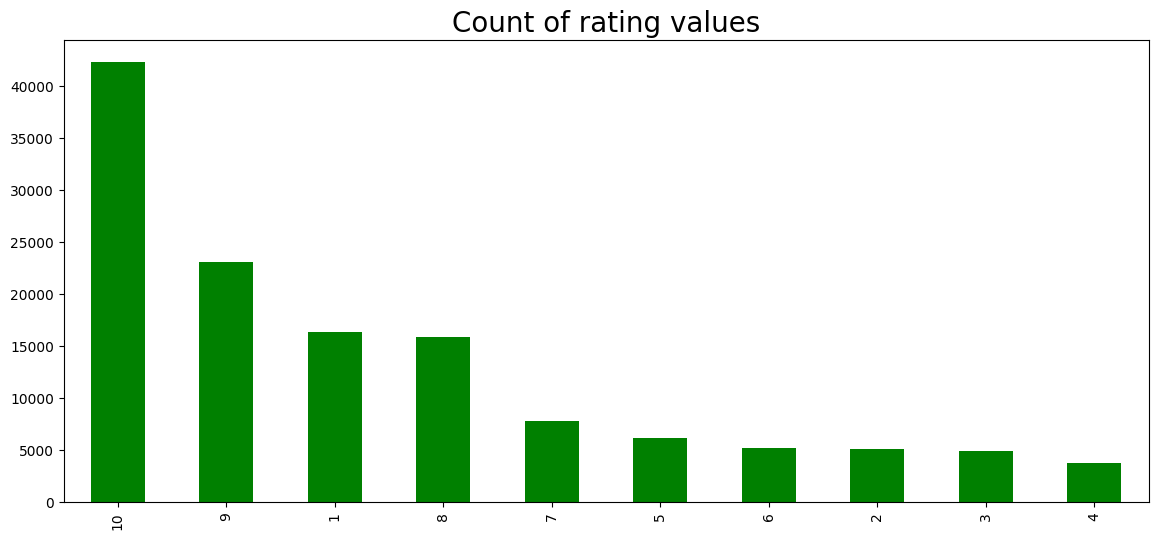

In [39]:
rating = data['rating'].value_counts().sort_values(ascending=False)
rating.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Count of rating values", fontsize = 20)
plt.show()

Most people choose four values; 10, 9, 1, 8, and the number of 10 is more than twice as many as the others. With this, we can see that the percentage of positives is higher than negative, and people's reactions are extreme.

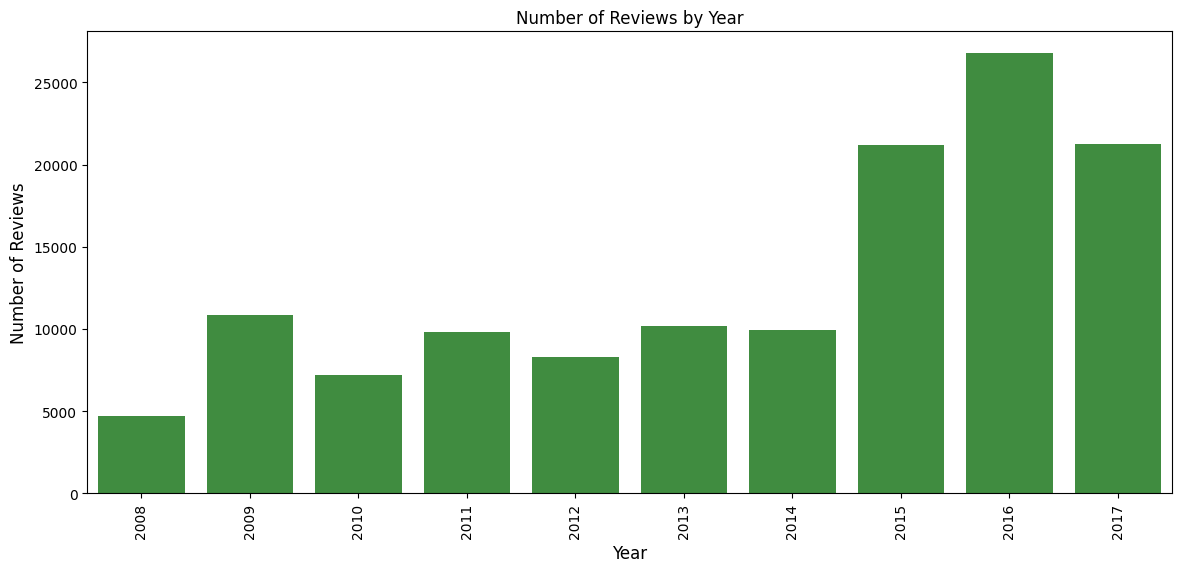

In [40]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
cnt_srs = data['date'].dt.year.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14, 6))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.title("Number of Reviews by Year")
plt.show()

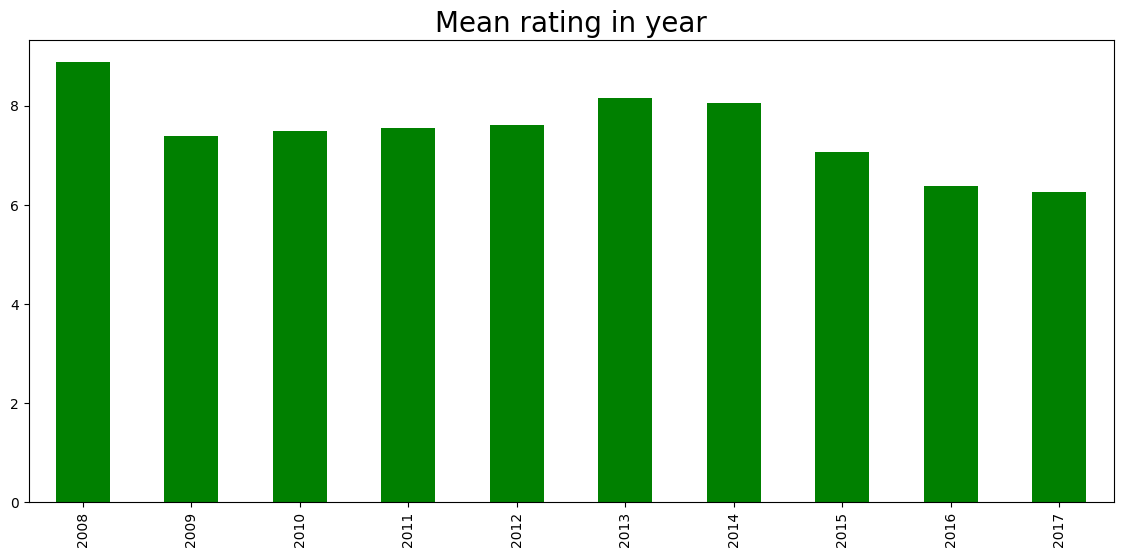

In [41]:
data['year'] = data['date'].dt.year
rating = data.groupby('year')['rating'].mean()
rating.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Mean rating in year", fontsize = 20)
plt.show()


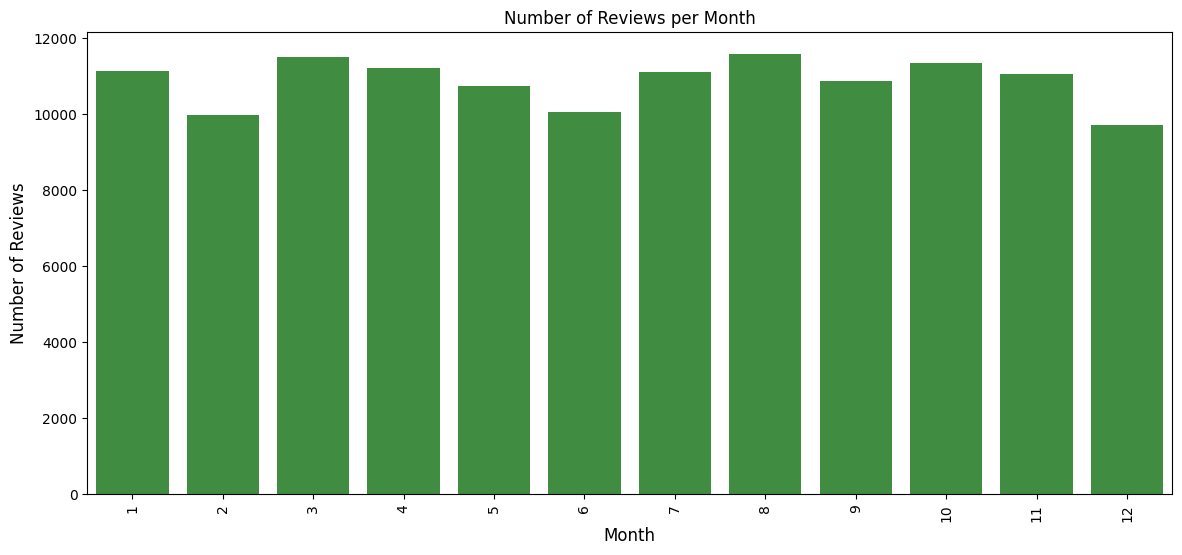

In [42]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
cnt_srs = data['date'].dt.month.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14, 6))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.title("Number of Reviews per Month")
plt.show()

In [43]:
data['month'] = data['date'].dt.month
rating = data.groupby('month')['rating'].mean()
rating.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Mean rating in month", fontsize = 20)

Text(0.5, 1.0, 'Mean rating in month')

In [44]:
data['day'] = data['date'].dt.day
rating = data.groupby('day')['rating'].mean()
rating.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Mean rating in day", fontsize = 20)

Text(0.5, 1.0, 'Mean rating in day')

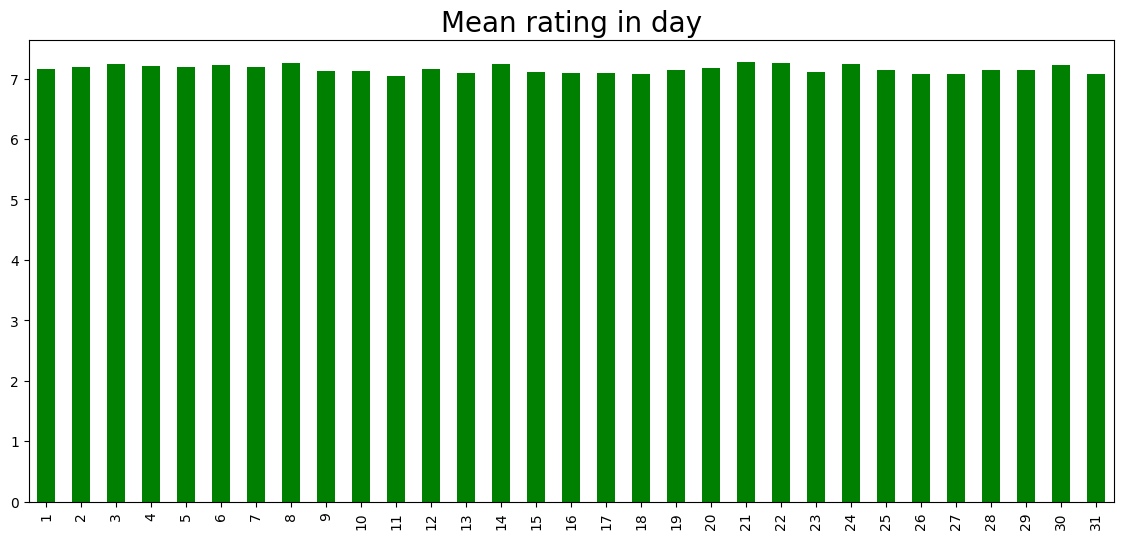

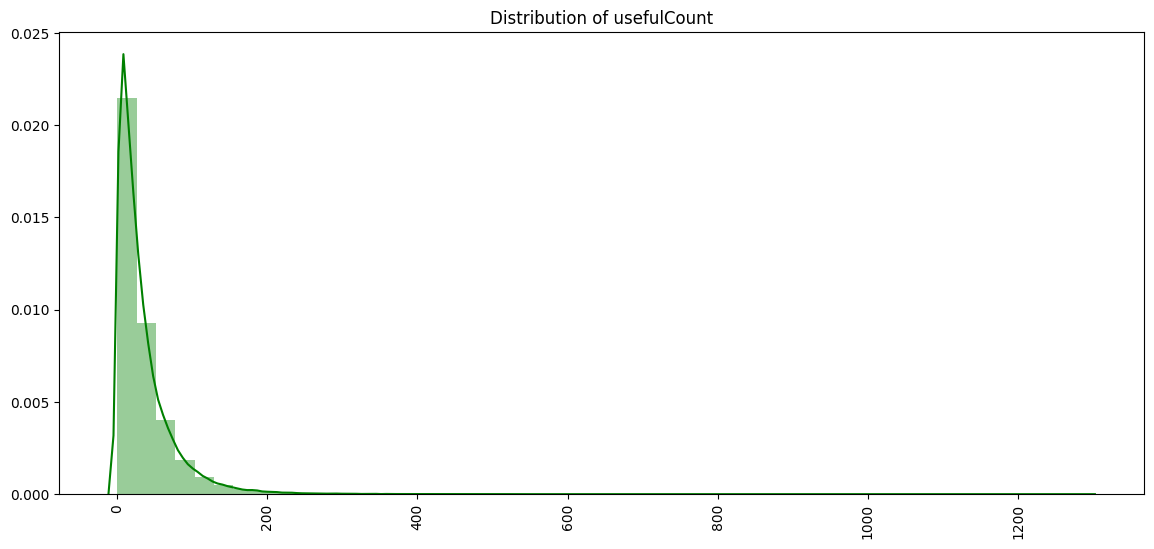

In [45]:
plt.figure(figsize=(14,6))
sns.distplot(data["usefulCount"].dropna(),color="green")
plt.xticks(rotation='vertical')
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.title("Distribution of usefulCount")
plt.show()

In [46]:
data["usefulCount"].describe()

count    130185.000000
mean         34.171410
std          40.301987
min           0.000000
25%           9.000000
50%          22.000000
75%          45.000000
max        1291.000000
Name: usefulCount, dtype: float64

In [47]:
percent = (data.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (14,6), fontsize = 10, color='green')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20)

Text(0.5, 1.0, 'Total Missing Value ')

In [48]:
print("Missing value (%):", 1200/data.shape[0] *100)

Missing value (%): 0.9217651803203134


In [49]:
data = data.dropna(axis=0)

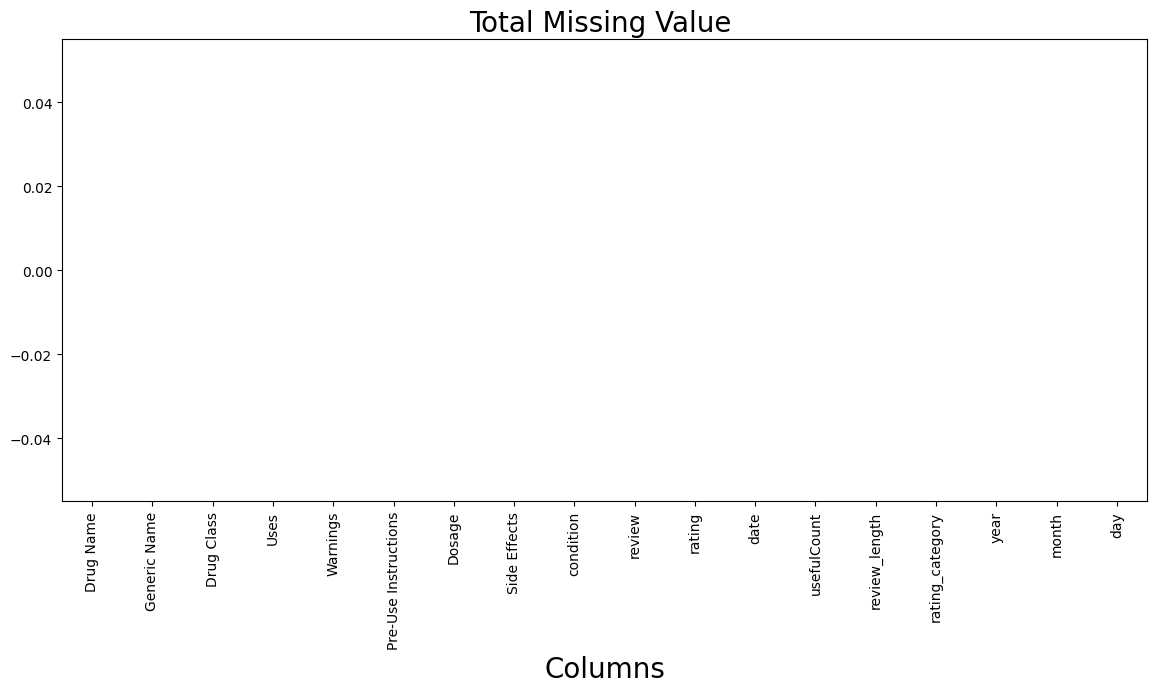

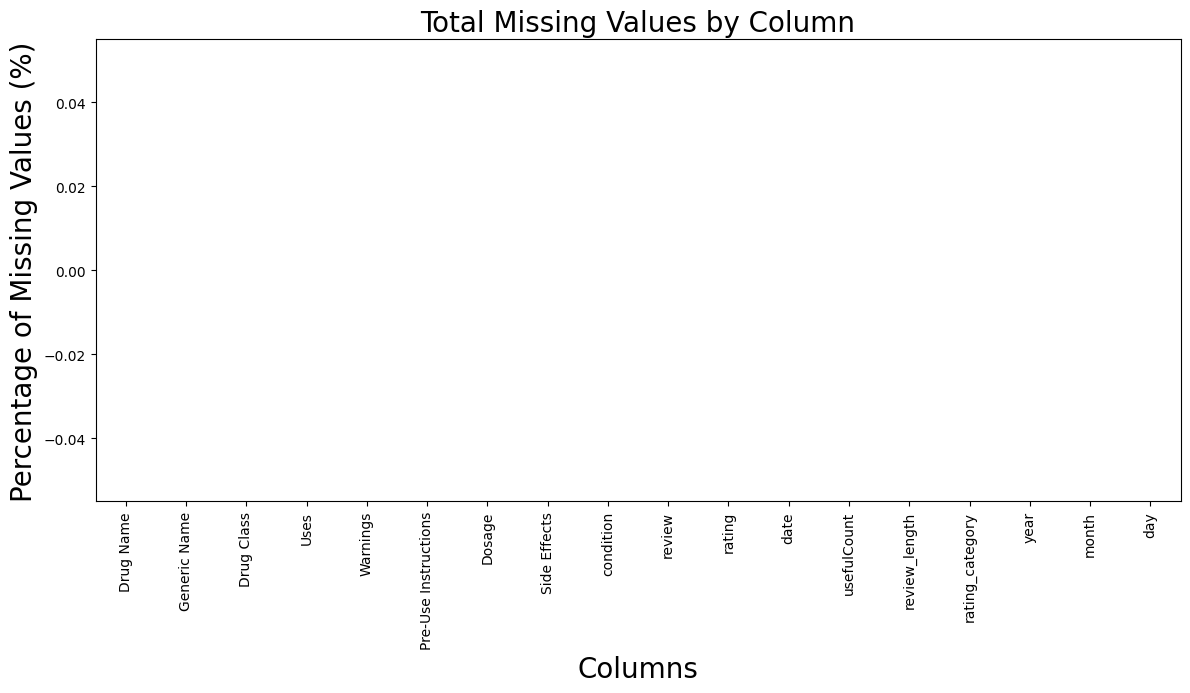

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

if 'index' in data.columns:
    del merged_data['index']
    
missing_percent = (data.isnull().sum() / len(data)) * 100
missing_percent = missing_percent.sort_values(ascending=False)

plt.figure(figsize=(14, 6))
missing_percent.plot(kind="bar", color='green', fontsize=10)
plt.xlabel("Columns", fontsize=20)
plt.ylabel("Percentage of Missing Values (%)", fontsize=20)
plt.title("Total Missing Values by Column", fontsize=20)
plt.show()


In [51]:
all_list = set(data.index)
span_list = []
for i,j in enumerate(data['condition']):
    if '</span>' in j:
        span_list.append(i)

In [52]:
new_idx = all_list - set(span_list)
valid_idx = [i for i in new_idx if i < len(data)]
data = data.iloc[valid_idx].reset_index(drop=True)
if 'index' in data.columns:
    del data['index']


In [53]:
df_condition = data.groupby(['condition'])['Drug Name'].nunique().sort_values(ascending=False)
df_condition = pd.DataFrame(df_condition).reset_index()
df_condition.tail(20)

condition  Drug Name
709                              Dumping Syndrome          1
710                                   Dyspareunia          1
711                             Ectopic Pregnancy          1
712                                  Ehrlichiosis          1
713                                         Warts          1
714                             Women (minoxidil)          1
715                               Dermatophytosis          1
716                        Diabetic Macular Edema          1
717                       Diagnostic Bronchograms          1
718                 Acute Nonlymphocytic Leukemia          1
719                          Acute Otitis Externa          1
720                  Acute Promyelocytic Leukemia          1
721         Adult Human Growth Hormone Deficiency          1
722                                          min)          1
723                                           mis          1
724                     mulation) (phenylephrine)          1
725  t Pac with Cyclobenzaprine (cyclobenzaprine)          1
726                              ailure to Thrive          1
727        amilial Cold Autoinflammatory Syndrome          1
728                          Abdominal Distension          1

In [54]:
df_condition_1 = df_condition[df_condition['Drug Name']==1].reset_index()
df_condition_1['condition'][0:10]

0                               Acetaminophen Overdose
1                                    Actinic Keratosis
2                                     Uveitis, Posteri
3                                  Anemia, Sickle Cell
4    Vitamin/Mineral Supplementation during Pregnan...
5                                      ungal Pneumonia
6                             von Willebrand's Disease
7                                  lic Acid Deficiency
8                                    llicular Lymphoma
9                                        mance Anxiety
Name: condition, dtype: object

In [55]:
all_list = set(data.index)
condition_list = []
for i,j in enumerate(data['condition']):
    for c in list(df_condition_1['condition']):
        if j == c:
            condition_list.append(i)
            
new_idx = all_list.difference(set(condition_list))
data =data.iloc[list(new_idx)].reset_index()
del data['index']

In [56]:
!pip install nltk

In [57]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [58]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CSELAB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
stops = set(stopwords.words('english'))

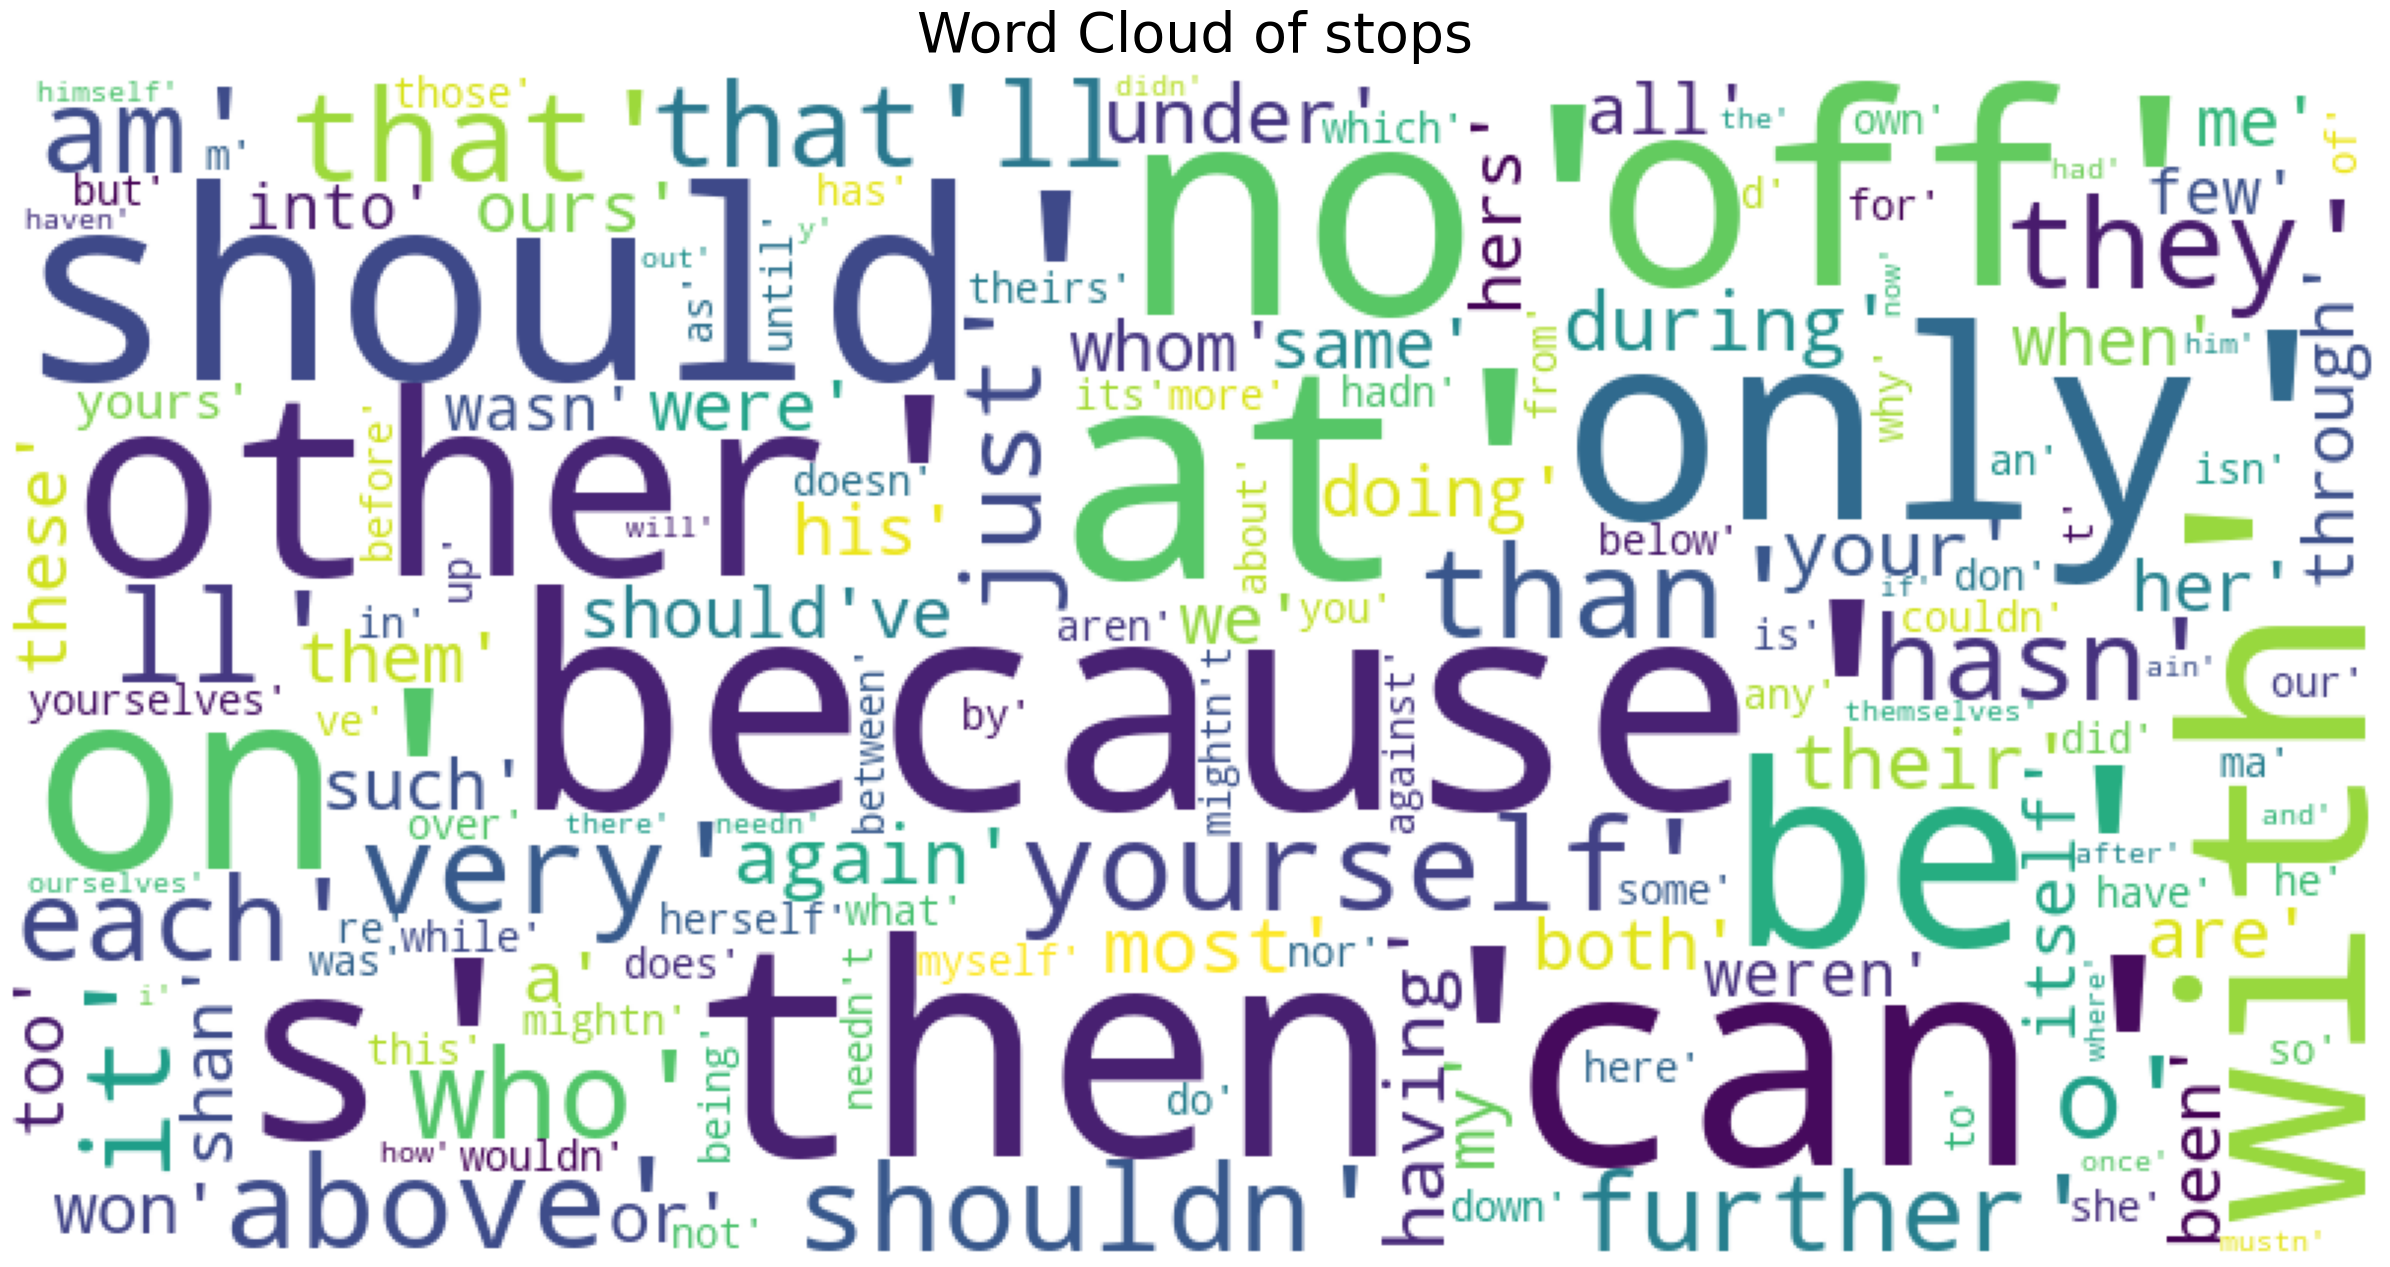

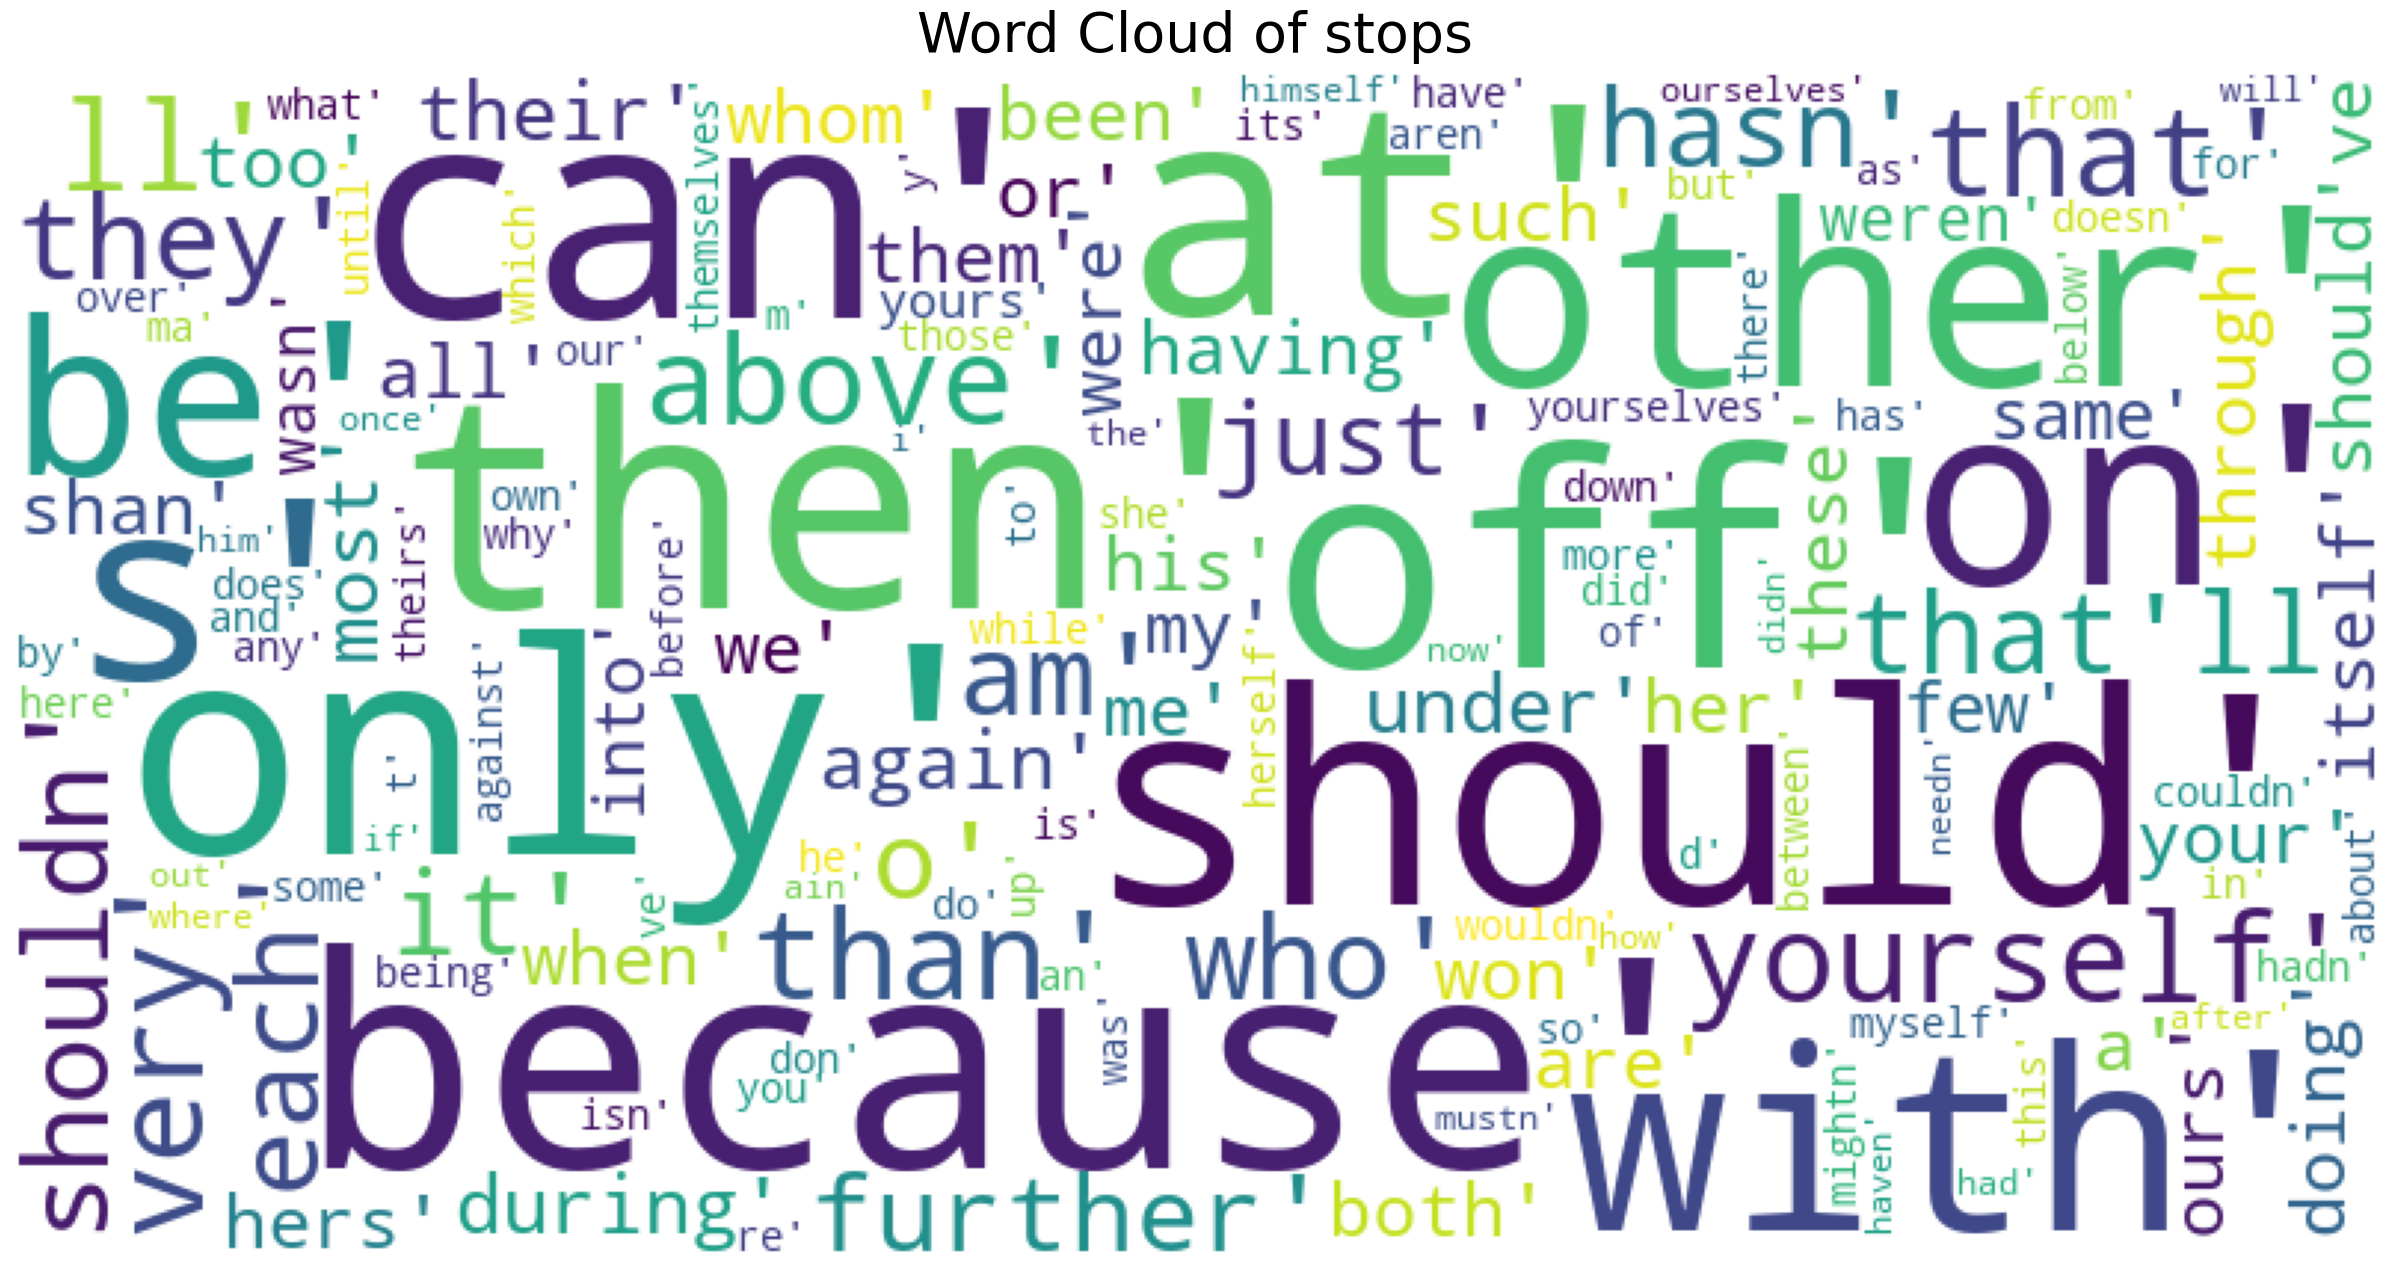

In [127]:
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(stops, title="Word Cloud of stops")
plt.show()

In [61]:
not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stops.remove(i)